In [5]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [9]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn plotly geopandas


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00a 0:00:01


In [11]:
import sys
!{sys.executable} -m pip show geopandas


Name: geopandas
Version: 1.0.1
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: numpy, packaging, pandas, pyogrio, pyproj, shapely
Required-by: 


In [13]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from matplotlib.colors import ListedColormap

# Setting visualization styles
sns.set(style="whitegrid")
%matplotlib inline

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('medicaid-vision-claims.csv')

# Display the first few rows
df.head()



YearStart  YearEnd LocationAbbr  LocationDesc DataSource  \
0       2019     2019           ND  North Dakota   Medicaid   
1       2019     2019           ND  North Dakota   Medicaid   
2       2019     2019           NE      Nebraska   Medicaid   
3       2019     2019           WI     Wisconsin   Medicaid   
4       2019     2019           WY       Wyoming   Medicaid   

                   Topic          Category  \
0  Eye Health Conditions  Cornea Disorders   
1  Eye Health Conditions  Cornea Disorders   
2  Eye Health Conditions  Cornea Disorders   
3  Eye Health Conditions  Cornea Disorders   
4  Eye Health Conditions  Cornea Disorders   

                                          Question     Response  \
0  Annual prevalence of diagnosed cornea disorders  Keratoconus   
1  Annual prevalence of diagnosed cornea disorders  Keratoconus   
2  Annual prevalence of diagnosed cornea disorders  Keratoconus   
3  Annual prevalence of diagnosed cornea disorders  Keratoconus   
4  Annual prevalence of diagnosed cornea disorders  Keratoconus   

                  Age  ... QuestionID ResponseID DataValueTypeID      AgeID  \
0         40-64 years  ...    QDXDC16      R16_1         CRDPREV    AGE4064   
1  40 years and older  ...    QDXDC16      R16_1         CRDPREV  AGE40PLUS   
2         40-64 years  ...    QDXDC16      R16_1         CRDPREV    AGE4064   
3  18 years and older  ...    QDXDC16      R16_1         CRDPREV  AGE18PLUS   
4          0-17 years  ...    QDXDC16      R16_1         CRDPREV     AGE017   

  GenderID RaceEthnicityID  RiskFactorID RiskFactorResponseID  \
0     GALL             OTH         RFALL                RFTOT   
1     GALL             UNK         RFALL                RFTOT   
2       GF             UNK         RFALL                RFTOT   
3       GM         ALLRACE         RFALL                RFTOT   
4       GF            AIAN         RFALL                RFTOT   

                            Geolocation  Geographic Level  
0  POINT (-100.1184210489 47.475319779)               NaN  
1  POINT (-100.1184210489 47.475319779)               NaN  
2  POINT (-99.36572062299 41.641040988)               NaN  
3  POINT (-89.81637074199 44.393191174)               NaN  
4  POINT (-108.1098303529 43.235541343)               NaN  

[5 rows x 36 columns]

In [15]:
# Get basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   700000 non-null  int64  
 1   YearEnd                     700000 non-null  int64  
 2   LocationAbbr                700000 non-null  object 
 3   LocationDesc                700000 non-null  object 
 4   DataSource                  700000 non-null  object 
 5   Topic                       700000 non-null  object 
 6   Category                    700000 non-null  object 
 7   Question                    700000 non-null  object 
 8   Response                    700000 non-null  object 
 9   Age                         700000 non-null  object 
 10  Gender                      700000 non-null  object 
 11  RaceEthnicity               700000 non-null  object 
 12  RiskFactor                  700000 non-null  object 
 13  RiskFactorResp

In [17]:
# Get descriptive statistics for numerical columns
df.describe()


YearStart   YearEnd     Data_Value  Low_Confidence_limit  \
count   700000.0  700000.0  527762.000000         527762.000000   
mean      2019.0    2019.0       0.541174              0.385119   
std          0.0       0.0       1.230868              0.914890   
min       2019.0    2019.0       0.000000              0.000000   
25%       2019.0    2019.0       0.000000              0.000000   
50%       2019.0    2019.0       0.060000              0.030000   
75%       2019.0    2019.0       0.500000              0.330000   
max       2019.0    2019.0      40.000000             21.130000   

       High_Confidence_Limit     Numerator   Sample_Size     LocationID  \
count          527762.000000  2.647270e+05  5.277620e+05  700000.000000   
mean                1.404946  1.539000e+03  2.115128e+05      30.435607   
std                 2.466290  1.793242e+04  1.500950e+06      16.223266   
min                 0.000000  1.000000e+01  1.000000e+01       4.000000   
25%                 0.080000  3.000000e+01  9.700000e+02      17.000000   
50%                 0.400000  1.000000e+02  1.180000e+04      30.000000   
75%                 1.540000  4.200000e+02  8.850000e+04      41.000000   
max                61.330000  3.560500e+06  6.950200e+07      72.000000   

       Geographic Level  
count               0.0  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [19]:
# Check for missing values
df.isnull().sum()


YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Category                           0
Question                           0
Response                           0
Age                                0
Gender                             0
RaceEthnicity                      0
RiskFactor                         0
RiskFactorResponse                 0
Data_Value_Unit                    0
Data_Value_Type                    0
Data_Value                    172238
Data_Value_Footnote_Symbol    527762
Data_Value_Footnote           527762
Low_Confidence_limit          172238
High_Confidence_Limit         172238
Numerator                     435273
Sample_Size                   172238
LocationID                         0
TopicID                            0
CategoryID                         0
QuestionID                         0
R

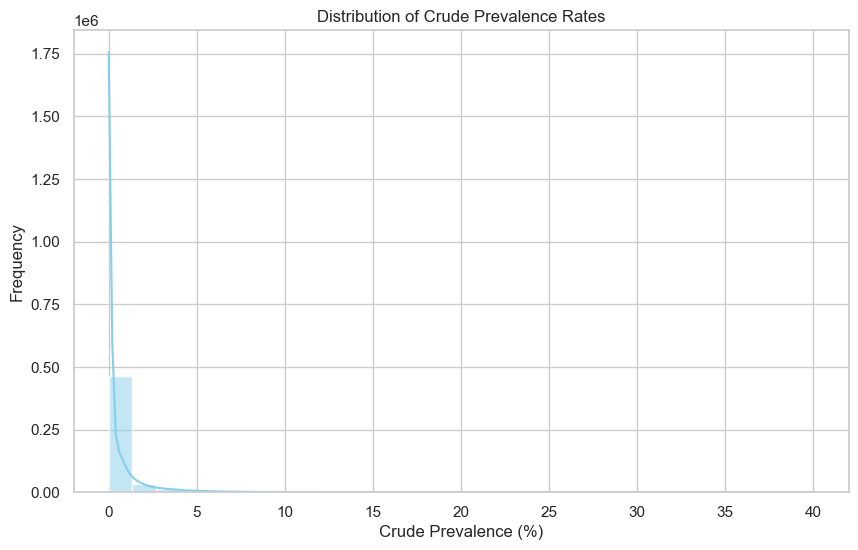

In [21]:
# Histogram of Data_Value - i. Distribution of Data_Value (Crude Prevalence)

plt.figure(figsize=(10,6))
sns.histplot(df['Data_Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Crude Prevalence Rates')
plt.xlabel('Crude Prevalence (%)')
plt.ylabel('Frequency')
plt.show()


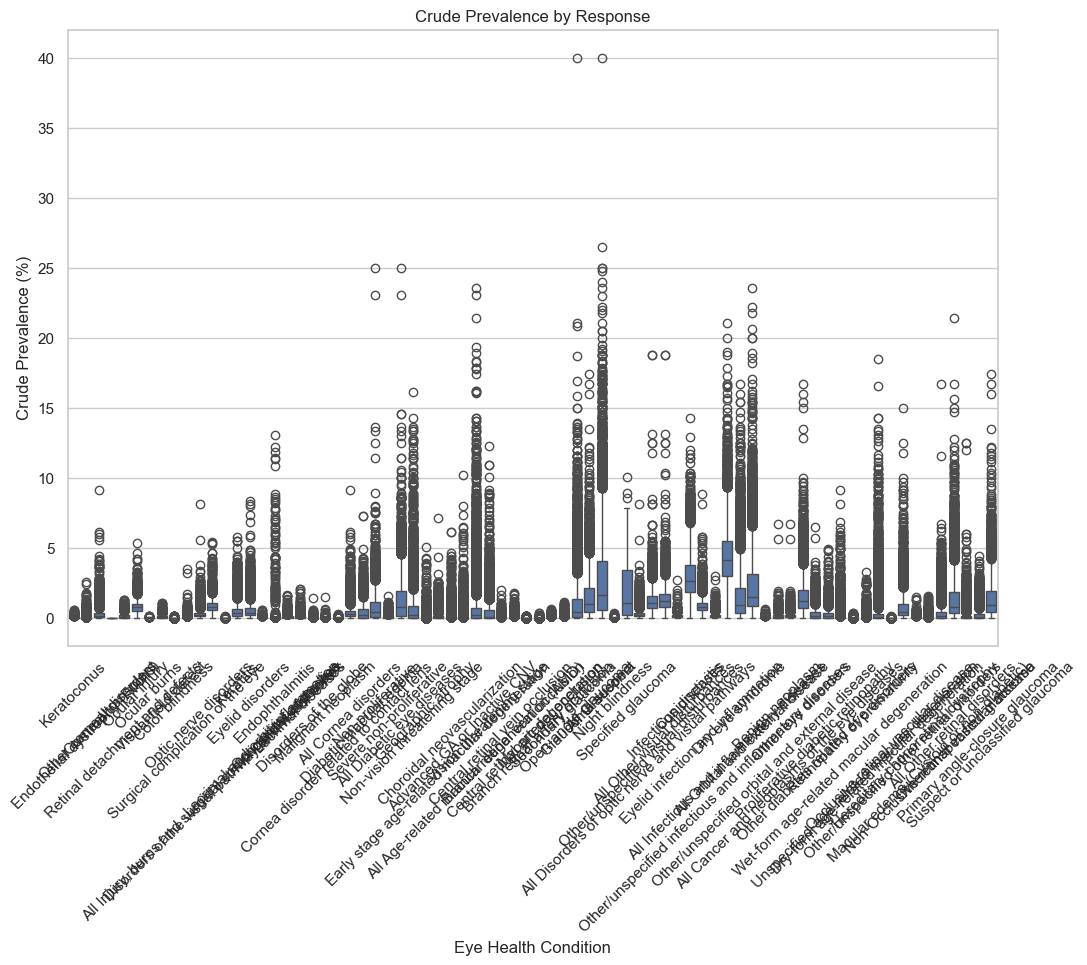

In [65]:
# Using 'Response' instead of 'Condition'
plt.figure(figsize=(12,8))
sns.boxplot(x='Response', y='Data_Value', data=df)
plt.title('Crude Prevalence by Response')
plt.xlabel('Eye Health Condition')
plt.ylabel('Crude Prevalence (%)')
plt.xticks(rotation=45)
plt.show()


/var/folders/v4/qlhg62013xx3mdknwztzdnb80000gn/T/ipykernel_87228/1660067784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='LocationDesc', data=df, order=df['LocationDesc'].value_counts().index, palette='viridis')


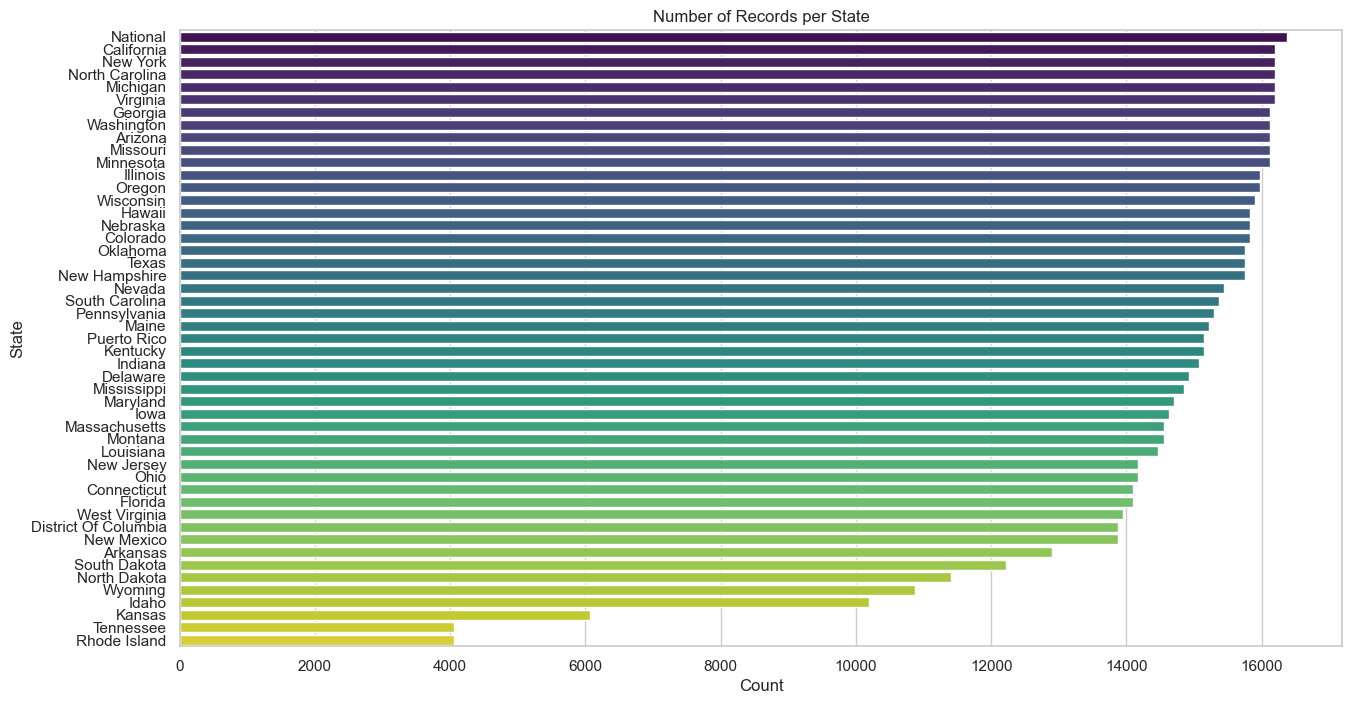

In [25]:
## Categorical Variables - i. Count of Records by LocationDesc (State)
plt.figure(figsize=(15,8))
sns.countplot(y='LocationDesc', data=df, order=df['LocationDesc'].value_counts().index, palette='viridis')
plt.title('Number of Records per State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


/var/folders/v4/qlhg62013xx3mdknwztzdnb80000gn/T/ipykernel_87228/2605725139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='coolwarm')


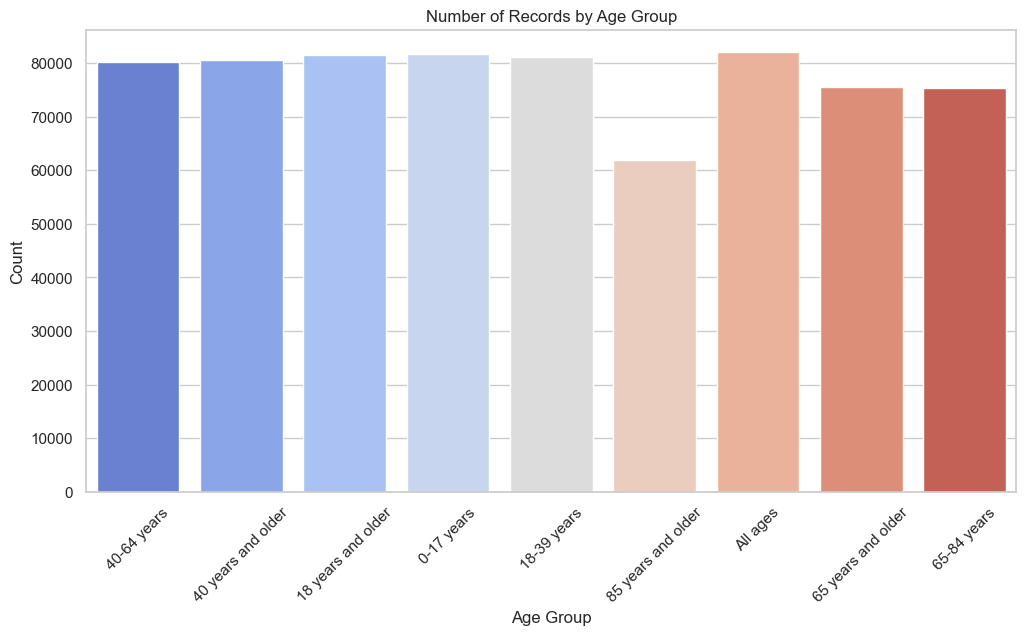

In [27]:
#ii. Count of Records by Age Group
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=df, palette='coolwarm')
plt.title('Number of Records by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



/var/folders/v4/qlhg62013xx3mdknwztzdnb80000gn/T/ipykernel_87228/167250486.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RaceEthnicity', y='Data_Value', data=df, ci=None, palette='Set2')
/var/folders/v4/qlhg62013xx3mdknwztzdnb80000gn/T/ipykernel_87228/167250486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RaceEthnicity', y='Data_Value', data=df, ci=None, palette='Set2')


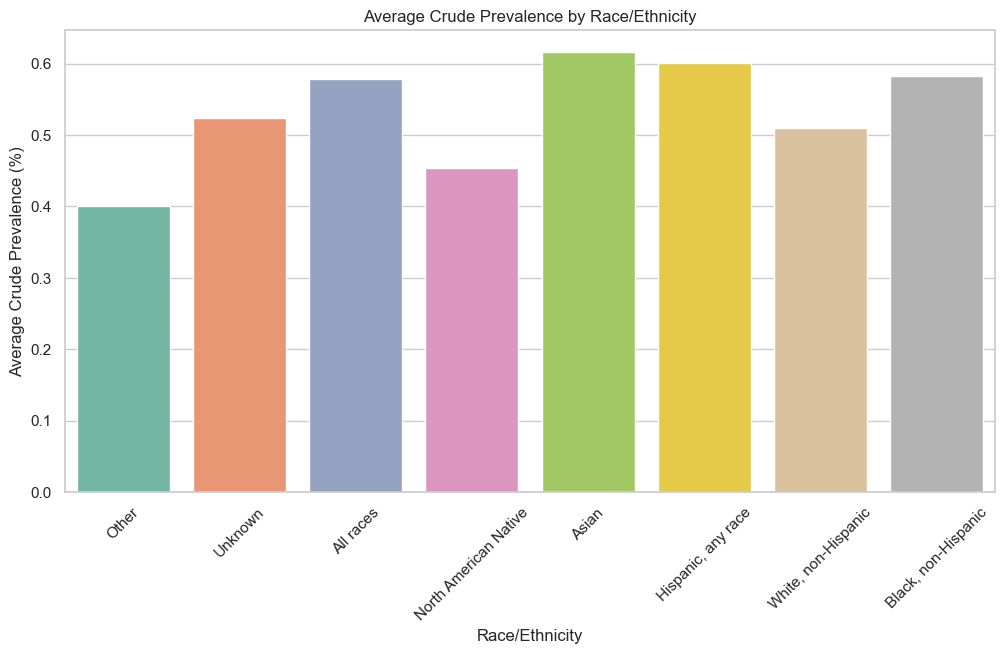

In [31]:
## Bar Plot of Data_Value by RaceEthnicity
plt.figure(figsize=(12,6))
sns.barplot(x='RaceEthnicity', y='Data_Value', data=df, ci=None, palette='Set2')
plt.title('Average Crude Prevalence by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Crude Prevalence (%)')
plt.xticks(rotation=45)
plt.show()



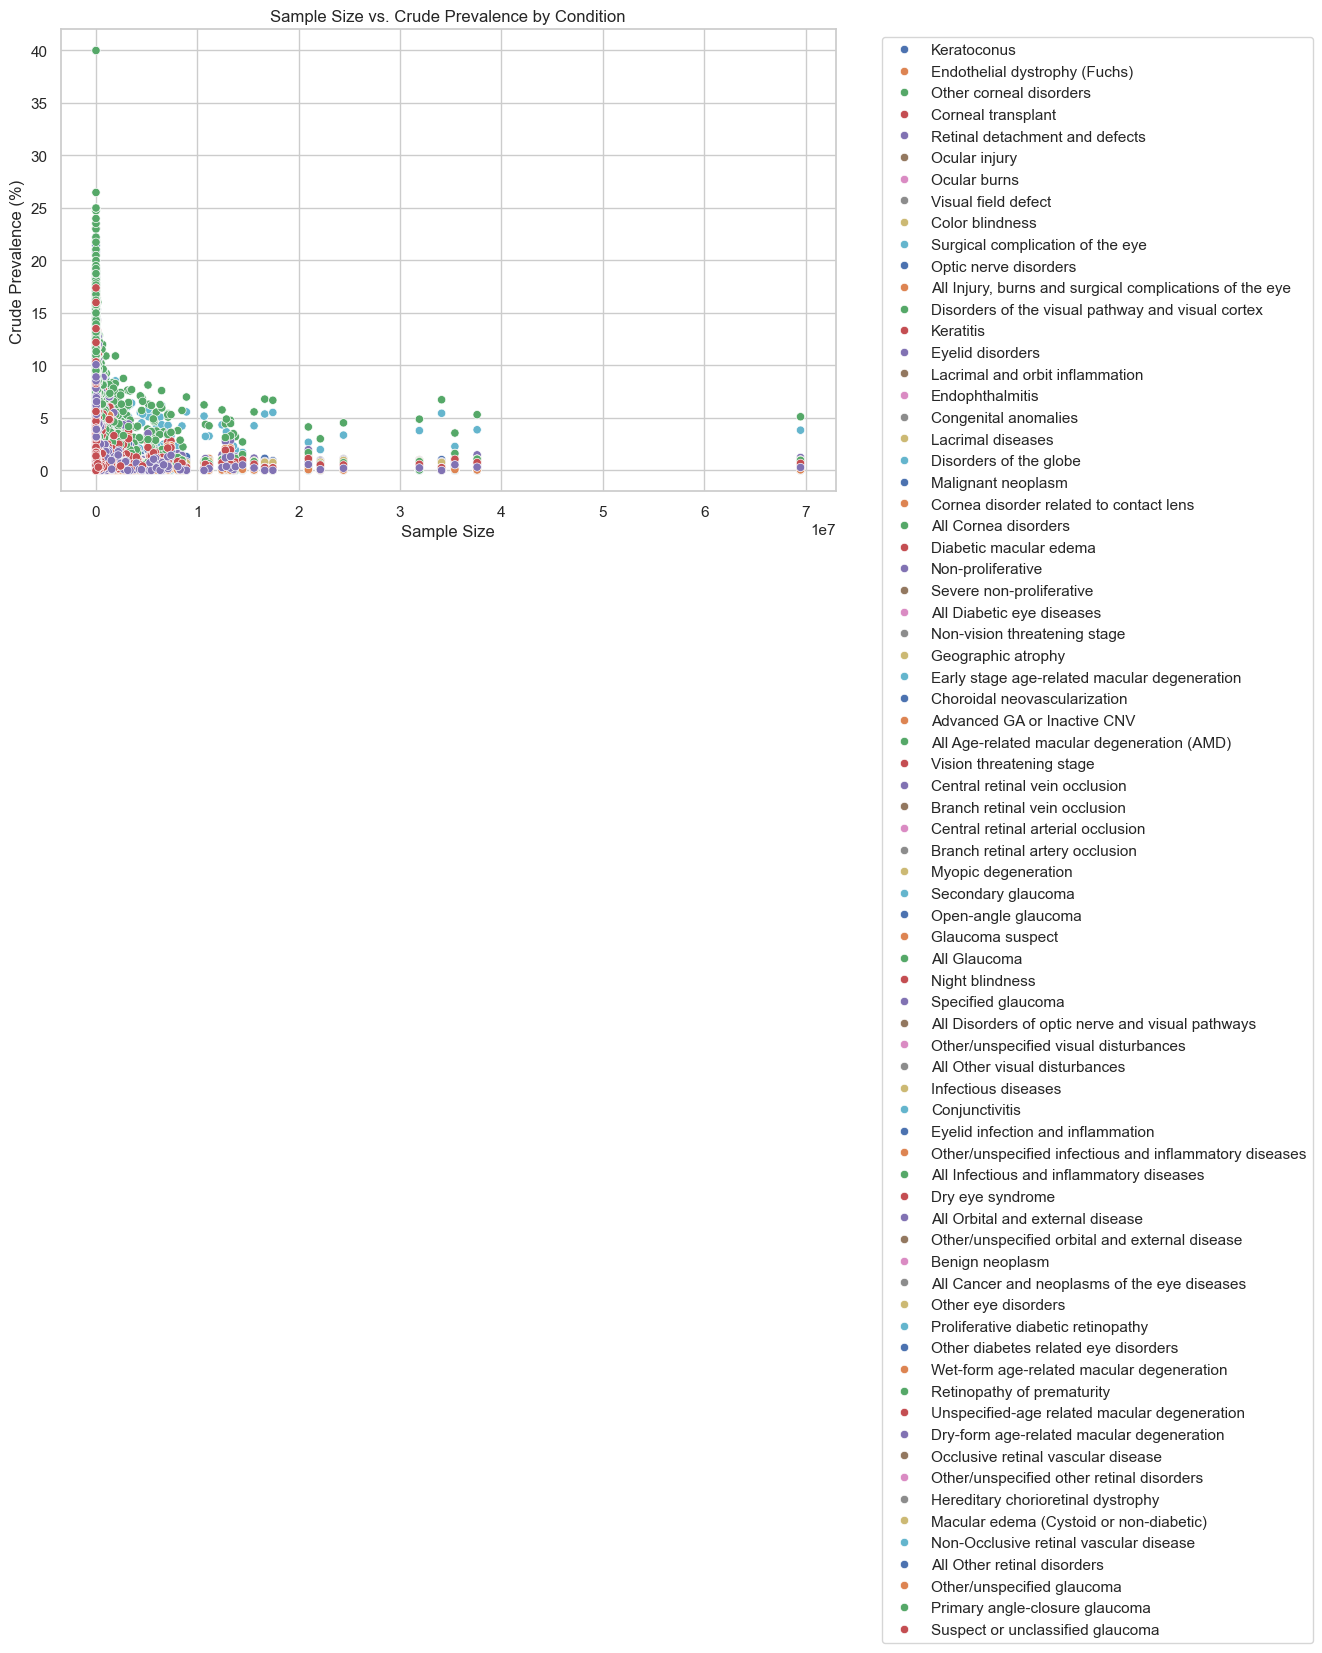

In [70]:
## Bivariate and Multivariate Analysis - b. Scatter Plot: Sample_Size vs. Data_Value
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sample_Size', y='Data_Value', hue='Response', data=df, palette='deep')
plt.title('Sample Size vs. Crude Prevalence by Condition')
plt.xlabel('Sample Size')
plt.ylabel('Crude Prevalence (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




/var/folders/v4/qlhg62013xx3mdknwztzdnb80000gn/T/ipykernel_87228/244943501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Data_Value', data=df, palette='Set3')


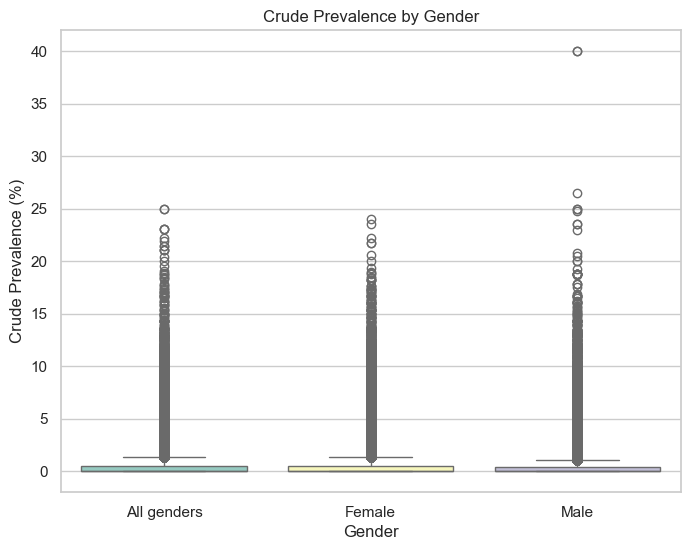

In [37]:
## 6. Bivariate and Multivariate Analysis - c. Boxplot: Data_Value by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Data_Value', data=df, palette='Set3')
plt.title('Crude Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Crude Prevalence (%)')
plt.show()



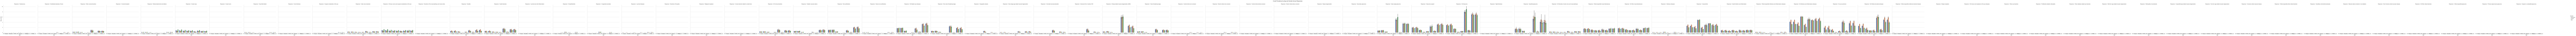

In [63]:
# Using 'Response' instead of 'Condition'
sns.catplot(x='Age', y='Data_Value', hue='Gender', col='Response', data=df, kind='bar', height=6, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle('Crude Prevalence by Age and Gender Across Responses', y=1.02)
plt.show()


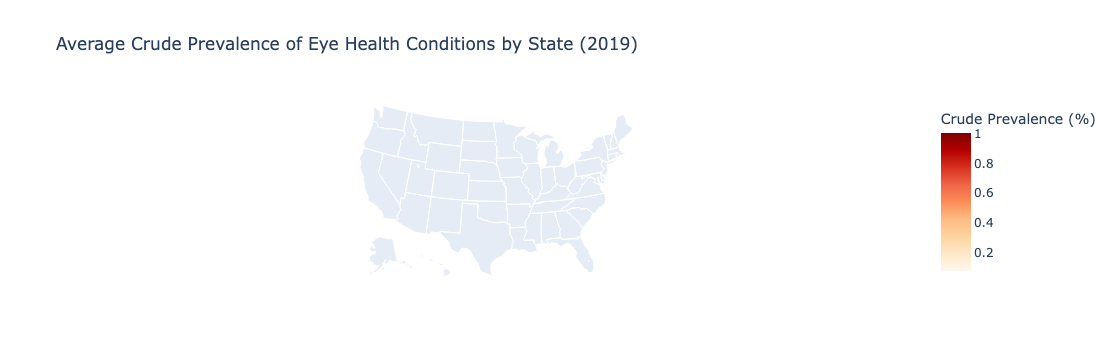

In [43]:
## 7. Geospatial Analysis - b. Interactive Geospatial Visualization with Plotly

# Interactive choropleth map using Plotly
import plotly.express as px

fig = px.choropleth(
    state_prevalence,
    locations='LocationDesc',
    locationmode="USA-states",
    color='Data_Value',
    scope="usa",
    color_continuous_scale="OrRd",
    labels={'Data_Value': 'Crude Prevalence (%)'},
    title='Average Crude Prevalence of Eye Health Conditions by State (2019)'
)

fig.show()



In [45]:
# Descriptive statistics for 'Data_Value'
df['Data_Value'].describe()


count    527762.000000
mean          0.541174
std           1.230868
min           0.000000
25%           0.000000
50%           0.060000
75%           0.500000
max          40.000000
Name: Data_Value, dtype: float64

In [49]:
# Calculate percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0]


Data_Value                     24.605429
Data_Value_Footnote_Symbol     75.394571
Data_Value_Footnote            75.394571
Low_Confidence_limit           24.605429
High_Confidence_Limit          24.605429
Numerator                      62.181857
Sample_Size                    24.605429
Geolocation                     2.339286
Geographic Level              100.000000
dtype: float64

In [51]:
# Pearson correlation between 'Data_Value' and 'Sample_Size'
df[['Data_Value', 'Sample_Size']].corr()


Data_Value  Sample_Size
Data_Value     1.000000    -0.020129
Sample_Size   -0.020129     1.000000

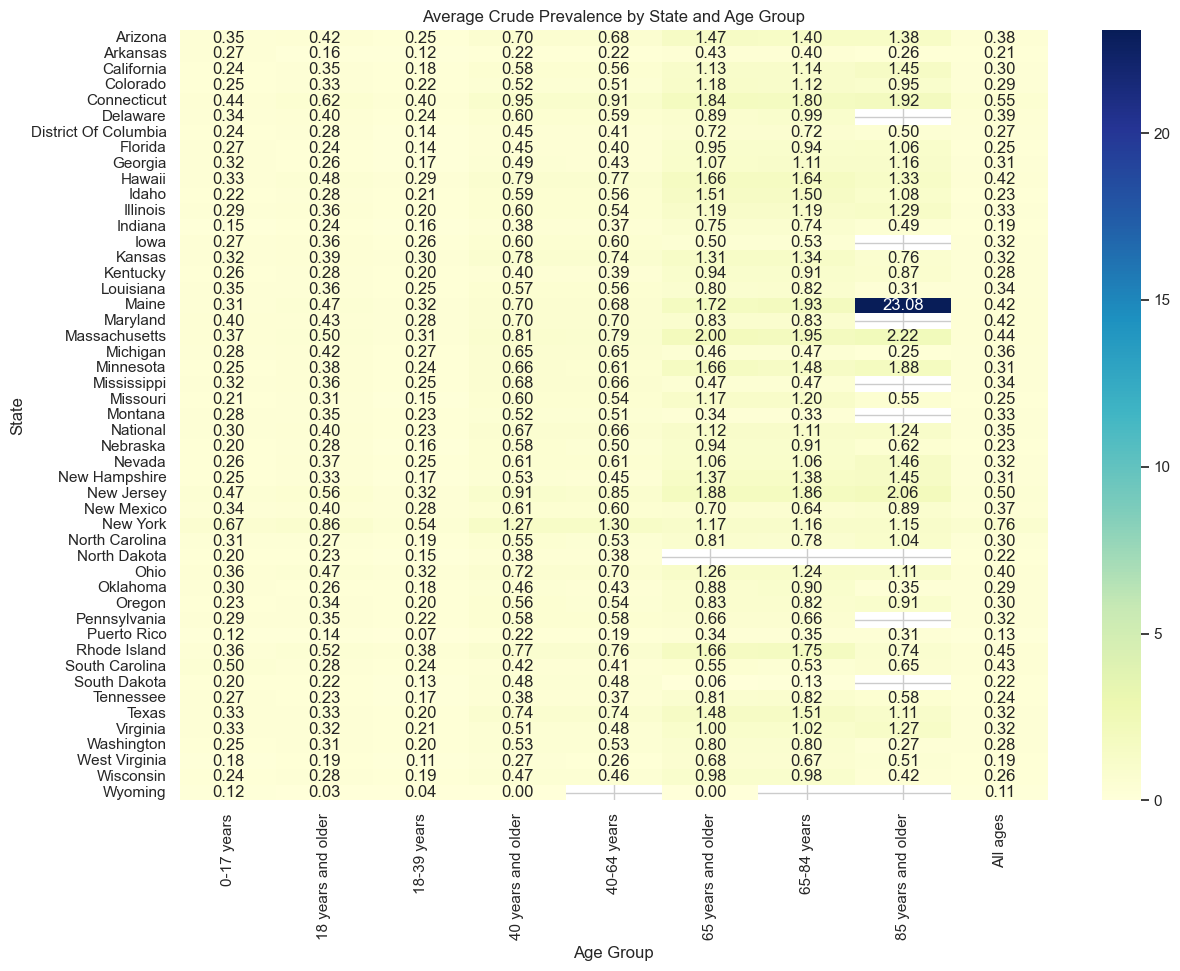

In [57]:
## b. Heatmap of Prevalence by State and Age Group
# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Data_Value', index='LocationDesc', columns='Age', aggfunc='mean')

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Crude Prevalence by State and Age Group')
plt.xlabel('Age Group')
plt.ylabel('State')
plt.show()

